# Build Graph

In [64]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [65]:
import re

In [66]:
city = dict()

In [67]:
def get_city_coordinate(city_coordinate):
    for index,line in enumerate(city_coordinate.split('\n')):
        if not line : continue

        city_pattern = re.compile(r"([\u4e00-\u9fa5]+)")
        city_name = city_pattern.findall(line)[0]
        
        coordinate_pattern = re.compile(r"\[(\d+.\d+),\s(\d+.\d+)\]")
        long,lat = coordinate_pattern.findall(line)[0]
        
        city[city_name] = (float(long),float(lat))
        
    return city

In [68]:
city_location = get_city_coordinate(coordination_source)

In [69]:
city_location

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '海口': (110.35, 20.02),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '台湾': (121.3, 25.03),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '西藏': (91.11, 29.97),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

In [70]:
import math

In [71]:
def formula_distance(origin,destination):
    ori_long,ori_lat = origin
    des_long,des_lat = destination
    
    radius = 6371
    
#   已知经纬度可以运用haversine formula 求两点之间的球面距离
#   math.radians 返回一个角度的弧度值  
    dlon = math.radians(des_long - ori_long)
    dlat = math.radians(des_lat - ori_lat)
    
    a = math.sin(dlat/2)**2+math.cos(math.radians(ori_lat))*math.cos(math.radians(des_lat)) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a) , math.sqrt(1-a))
    d = radius * c
    
    return d

In [72]:
def get_city_distance(origin,destination):
    return formula_distance(city_location[origin],city_location[destination])

In [73]:
get_city_distance('上海','杭州')

163.0760821403945

In [74]:
get_city_distance('合肥','香港')

1108.4082507057942

In [75]:
import networkx as nx

In [76]:
city_graph = nx.Graph()

In [77]:
city_graph.add_nodes_from(list(city_location.keys()))

In [78]:
%matplotlib inline

In [79]:
import matplotlib.pyplot as plt

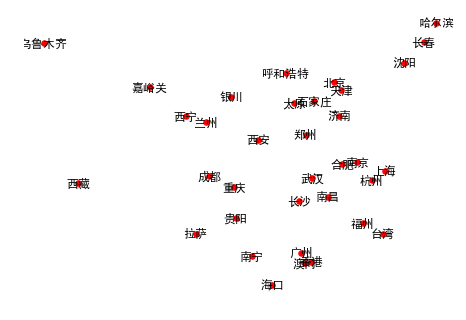

In [80]:
nx.draw(city_graph , city_location , with_labels=True , node_size=30)

In [81]:
threshold = 700

In [82]:
from collections import defaultdict

In [83]:
city_connection = defaultdict(list)

In [84]:
def get_city_connection(city_info):
    for name in city_info:
        for other_city in city_info:
            if name == other_city:continue
            city_distance = get_city_distance(name,other_city)
            if city_distance < threshold:
                city_connection[name].append(other_city)
    return city_connection

In [85]:
get_city_connection(city_location)

defaultdict(list,
            {'兰州': ['嘉峪关', '西宁', '成都', '西安', '银川'],
             '嘉峪关': ['兰州', '西宁'],
             '西宁': ['兰州', '嘉峪关', '成都', '银川'],
             '成都': ['兰州', '西宁', '拉萨', '贵阳', '西安', '重庆'],
             '石家庄': ['郑州', '济南', '太原', '西安', '北京', '天津', '呼和浩特'],
             '拉萨': ['成都', '贵阳', '重庆', '南宁'],
             '贵阳': ['成都', '拉萨', '长沙', '重庆', '南宁'],
             '武汉': ['郑州', '南京', '合肥', '杭州', '南昌', '福州', '长沙', '西安', '上海'],
             '郑州': ['石家庄',
              '武汉',
              '济南',
              '南京',
              '合肥',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特'],
             '济南': ['石家庄', '郑州', '南京', '合肥', '太原', '北京', '天津', '呼和浩特'],
             '南京': ['武汉', '郑州', '济南', '合肥', '杭州', '南昌', '福州', '上海'],
             '合肥': ['武汉', '郑州', '济南', '南京', '杭州', '南昌', '福州', '长沙', '上海'],
             '杭州': ['武汉', '南京', '合肥', '南昌', '福州', '台湾', '上海'],
             '南昌': ['武汉', '南京', '合肥', '杭州', '福州', '广州', '长沙', '台湾',

In [86]:
city_connection

defaultdict(list,
            {'兰州': ['嘉峪关', '西宁', '成都', '西安', '银川'],
             '嘉峪关': ['兰州', '西宁'],
             '西宁': ['兰州', '嘉峪关', '成都', '银川'],
             '成都': ['兰州', '西宁', '拉萨', '贵阳', '西安', '重庆'],
             '石家庄': ['郑州', '济南', '太原', '西安', '北京', '天津', '呼和浩特'],
             '拉萨': ['成都', '贵阳', '重庆', '南宁'],
             '贵阳': ['成都', '拉萨', '长沙', '重庆', '南宁'],
             '武汉': ['郑州', '南京', '合肥', '杭州', '南昌', '福州', '长沙', '西安', '上海'],
             '郑州': ['石家庄',
              '武汉',
              '济南',
              '南京',
              '合肥',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特'],
             '济南': ['石家庄', '郑州', '南京', '合肥', '太原', '北京', '天津', '呼和浩特'],
             '南京': ['武汉', '郑州', '济南', '合肥', '杭州', '南昌', '福州', '上海'],
             '合肥': ['武汉', '郑州', '济南', '南京', '杭州', '南昌', '福州', '长沙', '上海'],
             '杭州': ['武汉', '南京', '合肥', '南昌', '福州', '台湾', '上海'],
             '南昌': ['武汉', '南京', '合肥', '杭州', '福州', '广州', '长沙', '台湾',

In [87]:
city_with_road = nx.Graph(city_connection)

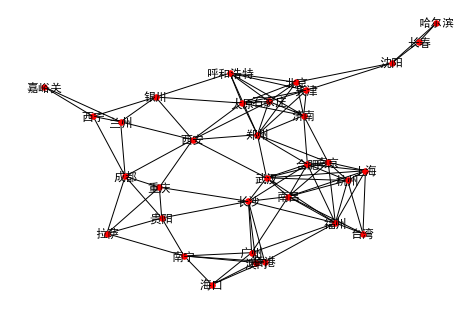

In [88]:
nx.draw(city_with_road,city_location,with_labels=True,node_size=30)

# BFS

In [90]:
city_connection

defaultdict(list,
            {'兰州': ['嘉峪关', '西宁', '成都', '西安', '银川'],
             '嘉峪关': ['兰州', '西宁'],
             '西宁': ['兰州', '嘉峪关', '成都', '银川'],
             '成都': ['兰州', '西宁', '拉萨', '贵阳', '西安', '重庆'],
             '石家庄': ['郑州', '济南', '太原', '西安', '北京', '天津', '呼和浩特'],
             '拉萨': ['成都', '贵阳', '重庆', '南宁'],
             '贵阳': ['成都', '拉萨', '长沙', '重庆', '南宁'],
             '武汉': ['郑州', '南京', '合肥', '杭州', '南昌', '福州', '长沙', '西安', '上海'],
             '郑州': ['石家庄',
              '武汉',
              '济南',
              '南京',
              '合肥',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特'],
             '济南': ['石家庄', '郑州', '南京', '合肥', '太原', '北京', '天津', '呼和浩特'],
             '南京': ['武汉', '郑州', '济南', '合肥', '杭州', '南昌', '福州', '上海'],
             '合肥': ['武汉', '郑州', '济南', '南京', '杭州', '南昌', '福州', '长沙', '上海'],
             '杭州': ['武汉', '南京', '合肥', '南昌', '福州', '台湾', '上海'],
             '南昌': ['武汉', '南京', '合肥', '杭州', '福州', '广州', '长沙', '台湾',

In [91]:
# 0 首先将start_city放入已访问的路径path_list中
# 1 首先根据出发点从city_connection中挑选出与start_city相邻的城市next_city_list
# 2 遍历next_city_list 得到next_city
# 3 首先应该判断next_city是否在之前已经访问过 判断是否存在于tuple visited中
# 4 若已经访问过则continue 继续判断next_city_list中的下一个元素
# 5 若没有访问过 比较next_city 与目的地 end_city是否一致
# 6 若next_city == end_city 则将[start_city]+[next_city] 直接返回([start_city]+[next_city])
# 7 若next_city != end_city  将next_city放入元祖visited中 作为已经访问的路径储存 
# 8 将[start_city]+[next_city]储存在路径列表path_list中 然后继续遍历next_city_list中下一个元素

In [92]:
def bfs_city_to_city(start_city, end_city):
    path_list = [[start_city]]
    visited = [start_city]

    while path_list:
        path = path_list.pop(0)
        city = path[-1]
        next_city_list = city_connection[city]
        for next_city in next_city_list:
            if next_city in visited: continue
            if next_city == end_city:
                return tuple(path + [next_city])
            visited.append(next_city)
            path_list.append(path + [next_city])

In [93]:
bfs_city_to_city("上海","香港")

('上海', '福州', '香港')

# Optimal search using variation of BFS
## 按距离最短来输出路径

In [104]:
# 1 首先根据出发点从city_connection中挑选出与start_city相邻的城市next_city_list
# 2 遍历next_city_list 得到next_city 
# 3 比较next_city 与目的地 end_city是否一致
# 4 若next_city == end_city 则将[start_city]+[next_city]储存在path_result list中
# 5 若next_city != end_city [start_city]+[next_city]储存在路径列表path_list中 然后继续遍历next_city_list中下一个元素
# 6 直到同一层中所有包含end_city的路径全部储存在path_result_list中
# 7 然后定义一个新函数get_path_distance计算path_result_list中各个路径的总距离
# 8 然后根据这个距离对path_result_list进行排序
# 9 返回距离最短的一条路径作为输出结果 结果以tuple的形式返回

In [147]:
def bfs_city_by_distance(start_city,end_city):
    pathes = [[start_city]]
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        successsors = city_connection[froniter]

        for city in successsors:
            if city in path: continue  # check loop

            new_path = path + [city]

            pathes.append(new_path)  # bfs

        pathes = path_sorted_by_distance(pathes)
        if pathes and (end_city == pathes[0][-1]):
            return pathes[0]

In [148]:
def path_sorted_by_distance(paths):
    def get_path_distance(path):
        distance = 0
        for index,city in enumerate(path[:-1]):
            distance += get_city_distance(path[index],path[index+1])
        return distance
    return sorted(paths,key=get_path_distance)

In [149]:
path_sorted_by_distance([["拉萨","成都","西安"],["拉萨","重庆","西安"]])

[['拉萨', '重庆', '西安'], ['拉萨', '成都', '西安']]

In [150]:
bfs_city_by_distance("拉萨","西安")

['拉萨', '重庆', '西安']

In [151]:
bfs_city_to_city("拉萨","西安")

('拉萨', '成都', '西安')

# DFS

In [173]:
def dfs_city_to_city(start_city, end_city):
    path_list = [[start_city]]
    visited = [start_city]

    while path_list:
        path = path_list.pop(0)
        city = path[-1]
        next_city_list = city_connection[city]
        for next_city in next_city_list:
            if next_city in visited: continue
            if next_city == end_city:
                return tuple(path + [next_city])
            visited.append(next_city)
            path_list.insert(0,path + [next_city])

In [178]:
dfs_city_to_city("北京","上海")

('北京', '呼和浩特', '银川', '西安', '重庆', '长沙', '福州', '上海')

# Machine Learning

In [195]:
from sklearn.datasets import load_boston
import random
from matplotlib import pyplot as plt

In [185]:
datasets = load_boston()

In [186]:
x,y = datasets["data"],data["target"]

In [187]:
x.shape

(506, 13)

In [188]:
datasets.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [192]:
datasets["DESCR"].split("\n")

['Boston House Prices dataset',
 '===========================',
 '',
 'Notes',
 '------',
 'Data Set Characteristics:  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive',
 '    ',
 '    :Median Value (attribute 14) is usually the target',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial high

In [205]:
X_RM = x[:,5]

In [207]:
X_RM

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 5.813,
       6.047, 6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 6.096, 5.933,
       5.841, 5.85 , 5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069,
       5.682, 5.786, 6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998,
       5.888, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 5.966, 6.456,
       6.762, 7.104, 6.29 , 5.787, 5.878, 5.594, 5.885, 6.417, 5.961,
       6.065, 6.245, 6.273, 6.286, 6.279, 6.14 , 6.232, 5.874, 6.727,
       6.619, 6.302, 6.167, 6.389, 6.63 , 6.015, 6.121, 7.007, 7.079,
       6.417, 6.405, 6.442, 6.211, 6.249, 6.625, 6.163, 8.069, 7.82 ,
       7.416, 6.727, 6.781, 6.405, 6.137, 6.167, 5.851, 5.836, 6.127,
       6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928, 6.176,
       6.021, 5.872, 5.731, 5.87 , 6.004, 5.961, 5.856, 5.879, 5.986,
       5.613, 5.693,

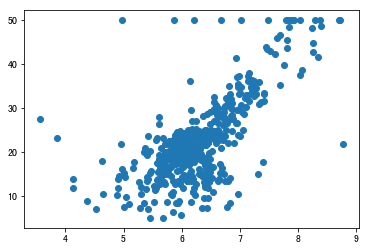

In [208]:
plt.scatter(X_RM,y)

# Gradient descent

### 假设房屋价格price与rm符合线性关系
### $$ y = k * rm + b $$

In [211]:
def price(rm,k,b):
    return k * rm + b

### 线性回归的loss function 使用最小二乘法
### $$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2$$

In [214]:
def loss_function(y,y_hat):
    return sum((y_i - y_hat_i)**2 for y_i , y_hat_i in zip(list(y),list(y_hat))) / len(list(y))

### 将y=k*rm+b代入到loss function中 并求出loss对于k和b的偏导
$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i$$
$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i})$$

In [215]:
def partial_derivative_k(x,y,y_hat):
    return sum((y_i - y_hat_i)*x_i for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)))*(-2) / len(y)

In [216]:
def partial_derivative_b(y,y_hat):
    return sum((y_i - y_hat_i) for y_i ,y_hat_i in zip(list(y),list(y_hat)))*(-2) / len(y)

In [227]:
k = random.random()*200 - 100
b = random.random()*200 - 100

learning_rate = 1e-3

iteration_num = 200
losses = []

for i in range(iteration_num):
    y_hat = [price(rm,k,b) for rm in X_RM]
    
    current_loss = loss_function(y,y_hat)
    losses.append(current_loss)
    
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_RM,y,y_hat)
    b_gradient = partial_derivative_b(y,y_hat)
    
    k = k + (-1*k_gradient)*learning_rate
    b = b + (-1*b_gradient)*learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 9103.995355321258, parameters k is 23.4609923817857 and b is -30.25995147679113
Iteration 1, the loss is 7679.776461992861, parameters k is 22.25714939551543 and b is -30.449253480157264
Iteration 2, the loss is 6479.434306228378, parameters k is 21.151967532892993 and b is -30.623045453459692
Iteration 3, the loss is 5467.777111012992, parameters k is 20.13736106078414 and b is -30.782598514939288
Iteration 4, the loss is 4615.144987919055, parameters k is 19.20590690909529 and b is -30.929079608847434
Iteration 5, the loss is 3896.5403648952874, parameters k is 18.350790362487782 and b is -31.063560042983873
Iteration 6, the loss is 3290.895104413668, parameters k is 17.565755202906082 and b is -31.187023326544033
Iteration 7, the loss is 2780.452825254912, parameters k is 16.845057938155247 and b is -31.300372365618696
Iteration 8, the loss is 2350.248318767532, parameters k is 16.183425781657093 and b is -31.404436068989362
Iteration 9, the loss is 1987.668

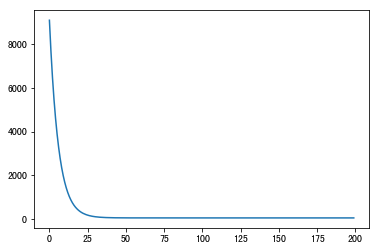

In [228]:
plt.plot(list(range(iteration_num)),losses)

In [229]:
price_use_best_parameters = [price(r,best_k,best_b) for r in X_RM]

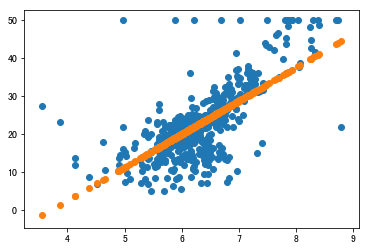

In [230]:
plt.scatter(X_RM,y)
plt.scatter(X_RM,price_use_best_parameters)